In [78]:
import librosa
import librosa.display
import IPython.display as ipd
import tempfile
import numpy as np

from datasets import load_dataset
from tqdm import tqdm

import matplotlib.pyplot as plt


In [24]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
ds = load_dataset("saahith/synthetic_with_val")

README.md:   0%|          | 0.00/576 [00:00<?, ?B/s]

C:\Users\Jeleazar\Desktop\AudioClassificationFeatures\env\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Jeleazar\.cache\huggingface\hub\datasets--saahith--synthetic_with_val. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


(…)-00000-of-00001-8cc622404e34766d.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

(…)-00000-of-00001-abf7d4ec65e51b60.parquet:   0%|          | 0.00/51.8M [00:00<?, ?B/s]

(…)-00000-of-00001-177814e48c69c3f2.parquet:   0%|          | 0.00/53.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/405 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/86 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/88 [00:00<?, ? examples/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcript', 'duration'],
        num_rows: 405
    })
    validation: Dataset({
        features: ['audio', 'transcript', 'duration'],
        num_rows: 86
    })
    test: Dataset({
        features: ['audio', 'transcript', 'duration'],
        num_rows: 88
    })
})

In [63]:
count = 0
for i, item in enumerate(ds['train']):
    file_name = item['audio']['path']
    print(f"Processing {file_name}")
    count+=1
print(count)

Processing 0_synth.wav
Processing 100_synth.wav
Processing 101_synth.wav
Processing 103_synth.wav
Processing 104_synth.wav
Processing 106_synth.wav
Processing 107_synth.wav
Processing 108_synth.wav
Processing 109_synth.wav
Processing 10_synth.wav
Processing 110_synth.wav
Processing 111_synth.wav
Processing 113_synth.wav
Processing 114_synth.wav
Processing 116_synth.wav
Processing 117_synth.wav
Processing 119_synth.wav
Processing 11_synth.wav
Processing 120_synth.wav
Processing 121_synth.wav
Processing 124_synth.wav
Processing 125_synth.wav
Processing 127_synth.wav
Processing 128_synth.wav
Processing 131_synth.wav
Processing 132_synth.wav
Processing 135_synth.wav
Processing 137_synth.wav
Processing 139_synth.wav
Processing 13_synth.wav
Processing 140_synth.wav
Processing 143_synth.wav
Processing 147_synth.wav
Processing 148_synth.wav
Processing 149_synth.wav
Processing 14_synth.wav
Processing 150_synth.wav
Processing 151_synth.wav
Processing 152_synth.wav
Processing 154_synth.wav
Proces

In [58]:
ds['train']['audio'][404]['path']

'9_synth.wav'

In [68]:
audio_data = ds['train']['audio'][1]['array']
sampling_rate = ds['train']['audio'][1]['sampling_rate']

ipd.Audio(audio_data, rate=10000)

# Note
### The problem is the hugging face file and the downloaded file differs in terms of extracted value

### Update 11/10/12: Upon checking MFCC the output are the same

In [100]:
def pre_process(audio_array, original_sr):
    # Target sampling rate for resampling
    target_sr = 22050 
    
    # Resample the audio array to target sampling rate
    signal = librosa.resample(audio_array.astype(np.float32), orig_sr=original_sr, target_sr=target_sr)
    
    # Check if it's stereo (more than 1 channel)
    if signal.ndim > 1:
        # Convert stereo to mono by averaging the channels
        signal = np.mean(signal, axis=0)
    
    return signal, target_sr

# Convert stereo to mono (two or more channels to sigle channel)
def pre_process_downloaded(audio_file):
    # convert to single Hz
    target_sr = 22050 
    # Load the data with resampling
    signal, sr = librosa.load(audio_file, sr=target_sr, mono=False, res_type='kaiser_fast')
    if signal.ndim > 1:  # Check if the signal is stereo
        # Convert stereo to mono by averaging the channels
        signal = np.mean(signal, axis=0)
    
    return signal.astype(np.float32), target_sr


In [101]:
signal, targer_sr = pre_process(audio_data, sampling_rate)

In [102]:
targer_sr

22050

In [103]:
ipd.Audio(signal, rate=targer_sr)

In [16]:
downloaded_audio = "AudioData/0_synth_2.wav"
ipd.Audio(downloaded_audio)

In [74]:
signal1, targer_sr1 = pre_process_downloaded(downloaded_audio)

In [75]:
signal1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
rmse = np.sqrt(mean_squared_error(signal, signal1))
print(f"RMSE between signals: {rmse}")

RMSE between signals: 0.05894581973552704


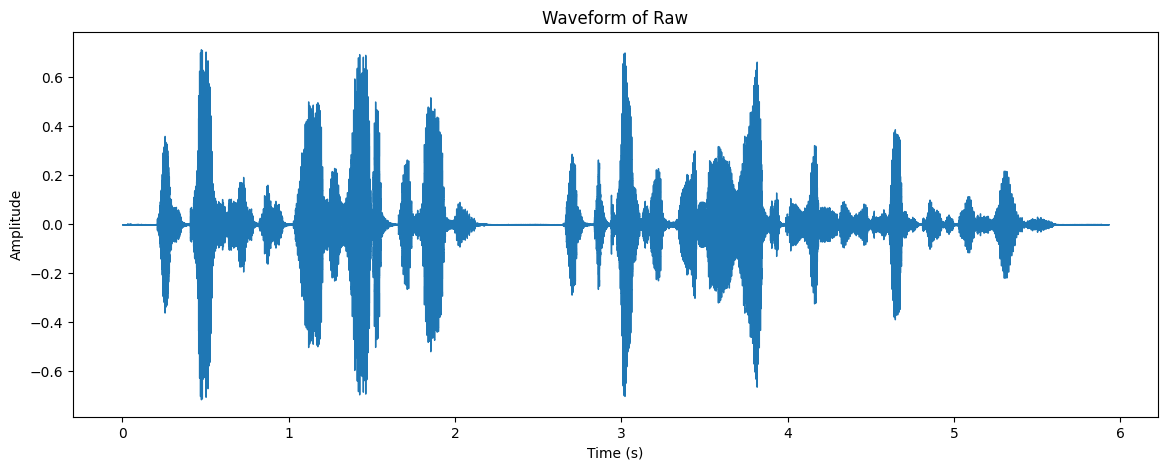

In [76]:
plt.figure(figsize=(14, 5))
# librosa.display.waveshow(human_signal, sr=human_sr)
librosa.display.waveshow(signal, sr=targer_sr)
plt.title('Waveform of Raw')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

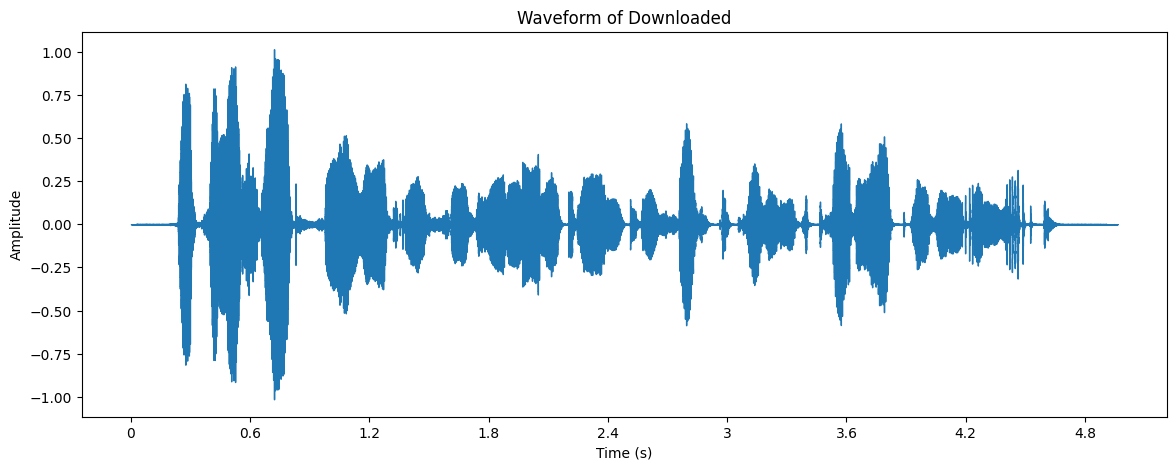

In [77]:
plt.figure(figsize=(14, 5))
# librosa.display.waveshow(human_signal, sr=human_sr)
librosa.display.waveshow(signal1, sr=targer_sr1)
plt.title('Waveform of Downloaded')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [71]:
def extract_MFCC(signal, sr):
    signal.shape # The output is 1 dimensional array with the following value
    # Sample rate
    # print("Signal: ", signal)
    # print("Sample Rate: ", sr)

    # Extract MFCC
    mfccs = librosa.feature.mfcc(y=signal, sr=22050, n_mfcc=13)
    # print(mfccs.shape) # First value is the number of rows, second value is the number of columns or frames
    # print(mfccs)

    # First Derivative -  Capture the temporal dynamics of the speech signal, providing information about how the MFCCs are changing.
    delta_mfccs = librosa.feature.delta(mfccs)
    # Second Derivative - Capture the dynamics of the delta features, providing additional information about the speech signal’s temporal characteristics.
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)

    comprehensive_mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    # print(comprehensive_mfcc)
    return comprehensive_mfcc

In [72]:
# Extract MFCC features and calculate the mean over time
mfcc = extract_MFCC(signal, targer_sr)
mfcc_mean = np.mean(mfcc.T, axis=0)
print(mfcc_mean)
mfcc2 = extract_MFCC(signal1, targer_sr1)
mfcc_mean2 = np.mean(mfcc.T, axis=0)

[-3.39649872e+02  9.04329376e+01 -4.81612587e+01  5.63328400e+01
  1.40703726e+00  8.96961117e+00 -2.29678555e+01 -3.15348864e+00
 -1.57998447e+01 -4.08006763e+00 -7.39768219e+00 -5.01079607e+00
 -2.24428988e+00  1.87898159e-01  1.25543475e-02 -1.16299063e-01
 -2.43459940e-02 -4.95329872e-02 -6.85875937e-02 -1.07497200e-01
 -8.64839405e-02 -6.33207709e-02 -7.25787506e-02 -9.03100446e-02
 -5.20437285e-02 -2.52602082e-02  1.10835642e-01  4.09081131e-02
 -1.02474615e-02  5.81695139e-03 -6.78643584e-03 -1.38506293e-05
 -1.53687596e-03  2.85783894e-02 -1.83947422e-02 -1.94651652e-02
 -5.14436699e-03 -2.12910548e-02 -1.36195421e-02]


In [73]:
print(mfcc_mean2)

[-4.15050293e+02  8.70116730e+01 -5.19482613e+01  5.23723679e+01
 -1.59251375e+01 -5.34570456e-01 -1.68654881e+01 -8.04703331e+00
 -1.70636120e+01 -1.16967707e+01 -1.59450121e+01 -2.01790190e+00
 -1.20870171e+01 -4.26105253e-04 -5.11839660e-03 -1.86403040e-02
 -5.06545464e-03 -1.49614678e-03 -3.19166817e-02 -5.36906242e-04
  1.71942040e-02 -2.80567724e-02 -2.43855417e-02 -2.02216394e-03
 -9.66502540e-03 -2.29043514e-02 -1.10973194e-01 -5.02579510e-02
  2.59435698e-02 -5.23896469e-03  1.06946817e-02  1.41626475e-02
  1.41921667e-02  1.73092969e-02 -6.60843728e-03 -1.63255092e-02
  3.33814532e-03  1.05486540e-02 -2.39880639e-03]


In [85]:
counter = 0
for i in tqdm(range (0, 10000000)):
    counter += 1
print(counter)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [00:02<00:00, 3637168.68it/s]

10000000


In [86]:
ds = load_dataset("birgermoell/synthetic_compassion_wav")

In [87]:
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 1722
    })
})

In [89]:
ds['train']['audio'][0]['array']

array([-9.15527344e-05, -1.22070312e-04, -1.22070312e-04, -1.52587891e-04,
       -1.52587891e-04, -1.83105469e-04, -1.52587891e-04, -1.52587891e-04,
       -1.22070312e-04, -1.52587891e-04, -1.52587891e-04, -1.52587891e-04,
       -1.52587891e-04, -9.15527344e-05, -1.22070312e-04, -9.15527344e-05,
       -1.22070312e-04, -1.52587891e-04, -9.15527344e-05, -9.15527344e-05,
       -6.10351562e-05, -3.05175781e-05, -9.15527344e-05, -9.15527344e-05,
       -9.15527344e-05, -9.15527344e-05, -6.10351562e-05, -9.15527344e-05,
       -9.15527344e-05, -1.22070312e-04, -9.15527344e-05, -1.22070312e-04,
       -1.22070312e-04, -1.22070312e-04, -9.15527344e-05, -9.15527344e-05,
       -9.15527344e-05, -9.15527344e-05, -3.05175781e-05, -6.10351562e-05,
       -6.10351562e-05, -3.05175781e-05, -6.10351562e-05, -9.15527344e-05,
       -6.10351562e-05, -9.15527344e-05, -1.22070312e-04, -1.22070312e-04,
       -9.15527344e-05, -1.22070312e-04, -6.10351562e-05, -3.05175781e-05,
       -6.10351562e-05, -

In [91]:
counter = 0
for i, item in tqdm(enumerate(ds['train'])):
    file_name = item['audio']['path']
    print(f"Processing {file_name}")
    counter += 1
print(counter)

220it [00:00, 1119.97it/s]

Processing 002b8fe3-6d6f-4fa1-8aa7-3516ea3bff16.wav
Processing 005104bc-71f3-4afe-90e7-d5cab787a643.wav
Processing 007d5a09-3a5e-4bd9-9908-e50612e88abe.wav
Processing 00812d8d-a5e9-4294-a211-44c8055e1f97.wav
Processing 00e3ad1a-b102-48cb-a4a6-f9978774cc16.wav
Processing 0109c79a-ce4c-45f1-9b13-773d93d798a2.wav
Processing 01107a07-4903-4b9e-9218-99ac12cc1632.wav
Processing 017349d4-3c9b-4277-a51e-12d272bbc8ce.wav
Processing 0188b86d-d1b6-426f-93bd-8d7f0baba237.wav
Processing 01a8708d-d01b-406b-82aa-247dd07894ce.wav
Processing 01b9fc9c-e551-4d24-9b4a-3fcfea904d9b.wav
Processing 01d851b2-28fd-4ef8-892e-209cfad4ac8f.wav
Processing 01db7bb2-830b-49e6-8b42-fbb6279f5a1a.wav
Processing 021500bc-fd8f-47d7-b660-8e7d5d7b559d.wav
Processing 021cd480-8a12-497a-86db-5a0b24452f30.wav
Processing 0250fde4-dbbf-4221-b26a-86edaf27b80e.wav
Processing 0271a7a1-bee4-416a-abd2-0184c7f9a054.wav
Processing 0281d144-f048-41ea-b09c-d465c9635219.wav
Processing 028bec87-5fd9-43bd-8d2f-458282563026.wav
Processing 0

460it [00:00, 1169.78it/s]

Processing 23bd319e-6002-44d8-831d-62ec0bb3915b.wav
Processing 23e46458-b362-49bf-b2ba-bb0d1eb291bd.wav
Processing 23efc44e-e6ee-43f6-a3db-37a669b6f517.wav
Processing 2415d0c8-b513-46b2-ad34-26ab3ef0e41c.wav
Processing 241b67d0-2650-4985-8190-c3ed05dbb55f.wav
Processing 24734541-ba18-47e0-ad10-4bb390f11ae7.wav
Processing 2479b657-4917-40f5-a121-718c372f1a93.wav
Processing 2486d815-381d-4c0a-924d-71344037cd6c.wav
Processing 24dd4bf2-9f38-4f96-9621-76e1d86ab71a.wav
Processing 24e20810-41bf-49a6-be48-7c6977b14457.wav
Processing 2505b76f-3fac-487f-8782-2fc7e5375514.wav
Processing 25217fb5-206e-4551-8fb1-7af7bd8f102b.wav
Processing 25272ae8-eb66-440b-802f-581a8d4b5693.wav
Processing 256f0fa7-5933-4072-b8b3-d24b4fee744e.wav
Processing 257c54c8-6768-47c3-8db0-50c65a31b20b.wav
Processing 2581a74a-4725-4476-a911-6bb62cf1ef32.wav
Processing 25c3bbee-4acc-484c-a2ee-a66544ef94be.wav
Processing 25c44155-128a-4662-8c5f-c941aef81f3a.wav
Processing 25c69f66-003e-4455-9c19-2abc17413501.wav
Processing 2

586it [00:00, 1198.07it/s]

Processing 46f33e7f-5c67-42d2-aa56-47db7d6c5aa1.wav
Processing 47239873-8ac8-4a81-8b92-8f92ac834df3.wav
Processing 47358c5c-7adc-4df1-9e4f-f90f935fdbcf.wav
Processing 4767b4a1-6a6c-4c9c-aa32-10a3b1642516.wav
Processing 4782c25a-ccc7-4f72-9c8b-0f24193d368b.wav
Processing 478bc453-e84d-41f3-aebd-694640972add.wav
Processing 47adb0ef-a6aa-4a08-a283-0dd7ddfae4ee.wav
Processing 47cc3122-12e8-42eb-b593-ec8603b2ebb4.wav
Processing 47cf193d-1ba4-418b-ae14-d604d198c20c.wav
Processing 47fb981b-b367-4b24-b1f2-7da9bdb4ca2c.wav
Processing 48093dc8-1328-4291-b763-80638f877e1e.wav
Processing 487de1c7-a61e-4ec2-b45b-534987c80597.wav
Processing 48801bb3-48d3-40b7-8828-668951f67de2.wav
Processing 488ef983-c2f2-4974-8774-de6ce8ef39c1.wav
Processing 4905a3e4-e67c-4196-a585-48f53f57fee4.wav
Processing 493df875-befe-4755-b030-1f8cc67048f0.wav
Processing 4947c183-bfc9-4243-8185-c9fe2f336f20.wav
Processing 49a55b80-ddd2-4afb-8015-22b94d8d45a3.wav
Processing 49bc9188-7514-4d5e-9d77-ad7986662ee0.wav
Processing 4

842it [00:00, 1237.60it/s]

Processing 6ce69568-365c-4a31-943e-b8e5eaf8424c.wav
Processing 6cfce3a1-9f7b-4c9b-8c24-4e999a287bd9.wav
Processing 6d193a61-6851-45f2-80b3-765572134c61.wav
Processing 6d277d69-bfc6-42d3-b724-d345af6fedf1.wav
Processing 6d28d627-f01d-46b8-8dca-0fefe6f0612d.wav
Processing 6d32b960-1288-4785-8c48-9c3cca8abc49.wav
Processing 6d441853-5732-4c94-ba10-aa40efc53ee0.wav
Processing 6d54f588-9084-44a3-ab13-fe65f2b3f716.wav
Processing 6d8d6dec-5a5c-4014-8944-c4d8ea5d99e5.wav
Processing 6de4fffa-f716-4f6b-83f7-511f78bcae92.wav
Processing 6e32ffe6-f802-43d2-8856-cfc8c30fffeb.wav
Processing 6e595460-812f-4a07-b925-f7a8712ca76a.wav
Processing 6e773359-5050-4814-aa2c-2e5559d2c6fd.wav
Processing 6e9023b4-11a8-4093-807d-bfbdbc3506a8.wav
Processing 6eca3f65-7107-48bf-b9da-dce121db9e92.wav
Processing 6f26aa92-f7a9-4470-a797-311a57f03dc5.wav
Processing 70156d7f-8b15-418d-9563-a183fd95818c.wav
Processing 7041356d-f1f1-425a-9e77-fe504ee4c3cf.wav
Processing 706cd792-d388-4eb6-91ef-115552b91d9c.wav
Processing 7

1089it [00:00, 1215.57it/s]

Processing 928eab5a-f621-42fd-9b69-46070382abb6.wav
Processing 92a46d30-adea-4c27-af65-6f5d2e444f3f.wav
Processing 92b54f37-e98b-4926-a0e4-217c9723c078.wav
Processing 93165889-4fe1-463d-b741-84a175c7a36d.wav
Processing 93441dae-e3e7-4e7f-b8b2-71f0380daece.wav
Processing 93bc76fb-90f4-4cc2-93be-5db46be45e30.wav
Processing 93cfb870-e581-4499-bafc-e19ed2c35d30.wav
Processing 93f05d3d-09fd-4b93-91f8-fef3db6cdd65.wav
Processing 943c7e80-3cd5-425b-b086-78a072b9a8cb.wav
Processing 945d3780-1181-4395-8838-64639c406c44.wav
Processing 94630c3b-b335-479b-b6be-a27929cf68ab.wav
Processing 9464abe1-ca32-434d-8738-78cec77272aa.wav
Processing 946c7f32-75ec-4b03-8775-d9264c06e9dc.wav
Processing 94c024f0-c16c-409a-a991-39744be2ff94.wav
Processing 94c9bbda-7b9b-4940-a1f1-52c791807f97.wav
Processing 95027a23-8906-41b7-bd33-be4267c01e9f.wav
Processing 95030ff7-3771-4c3d-8b66-9876fc8cf144.wav
Processing 950f66d5-a083-4341-a8a4-6b66a451126c.wav
Processing 9512cbde-6736-4803-86c0-96e6a86237d4.wav
Processing 9

1327it [00:01, 1142.20it/s]

Processing b1700353-49f7-496e-bbb7-769998a21fb1.wav
Processing b1905e02-239f-4150-a5c6-4858a05f65db.wav
Processing b1908b61-7f3d-4c6f-9af2-7853cc38365c.wav
Processing b190ff3a-0681-47f4-a0a6-5324659f9306.wav
Processing b1c2ba36-2dba-4a29-aaa6-79fd81786ac3.wav
Processing b20a0b63-5eca-49d9-9ab2-c8ddc70f2468.wav
Processing b2114cc5-7b8a-42cc-b1ad-9a97e5bf78b2.wav
Processing b25b6f67-2acb-4785-827e-b4a2d0332473.wav
Processing b27a80f7-e166-45da-b6d6-0405d0a5715f.wav
Processing b2d52040-d210-4ace-af87-e98ca8a5b985.wav
Processing b2dcba41-49da-4f1f-bc2d-84785cb49949.wav
Processing b2f38545-cc86-4a16-8e25-ef32c8fb9ab7.wav
Processing b30699ed-7638-4bce-91a4-eb8674e66512.wav
Processing b30b104d-7128-4173-9b51-03bc4b35901a.wav
Processing b34f5fc3-8a5b-46f5-ad5d-ec6d81e8ee00.wav
Processing b3551b8f-d86c-4b2f-a6a5-3862defadf08.wav
Processing b358618a-34ab-4d5e-9f70-947664085978.wav
Processing b35f8692-af1e-4adb-bd10-d8494f6addba.wav
Processing b3697b41-0495-46fc-a320-316b00af904d.wav
Processing b

1442it [00:01, 1113.96it/s]

Processing d1ce5758-b602-4d17-8c41-d75e3fd67db8.wav
Processing d1d436ae-9038-4e62-acf6-ace6d10ada31.wav
Processing d1e5bae9-e378-4a1e-ab8e-bce4f02c92f8.wav
Processing d217da89-c9db-4fae-92ee-51fe4dd87b0f.wav
Processing d22e7fc0-7696-4e15-a309-364fa32066ee.wav
Processing d2451a70-5c83-4b2a-ac5c-ecd570e6c1a7.wav
Processing d28b2f37-3798-482d-bc9a-fb67c45da68f.wav
Processing d2987bbe-9132-4fcc-a976-a634509fd793.wav
Processing d29b9756-6a78-41a7-9319-7506713d7518.wav
Processing d2c47fcd-1875-4522-81a6-80f60504ce04.wav
Processing d2cb8291-2db9-46a6-a443-728b33fdd62d.wav
Processing d2d80bbc-c92a-4c8a-bad6-e0f10e69a4cf.wav
Processing d2d8f756-dd01-4ee0-aa1e-4384225dabf2.wav
Processing d2e33e43-e2d2-4e61-ba7a-b9f5d3df510d.wav
Processing d306da51-2589-4439-9113-3dc986d2efe5.wav
Processing d395060a-c8cf-4ff0-b009-9be9387b7e4d.wav
Processing d3b58707-bffd-45a2-ac78-fee637ded6a1.wav
Processing d3b661e5-4fe7-499b-903a-19339f5643bc.wav
Processing d3e16385-ccda-4ea9-9cd7-46ae0dd378ce.wav
Processing d

1646it [00:01, 771.88it/s] 

Processing dd518507-1565-4015-a564-85d072f4057f.wav
Processing dd817b4b-ccab-4443-8557-b5b02b6068d4.wav
Processing dd8a75d7-26ba-4336-a36a-26242661d59d.wav
Processing dd8e9486-4f87-4627-8341-2d93c6a9e535.wav
Processing ddd56d04-3277-40cd-afb6-89f7d6bcc4fc.wav
Processing ddde1c15-76da-42d4-8f16-39e69ac96107.wav
Processing de0e7530-81b9-42a3-98e2-ebd34f00d89d.wav
Processing de3587ef-a7a3-4a5c-a6c0-390020d6d495.wav
Processing de969108-ff3b-4a86-9772-6af8445f4df7.wav
Processing de97bcbb-25b9-4295-b32e-7cf0f9b521f7.wav
Processing dea3f3c3-9c35-4ebc-b6aa-00da7d748168.wav
Processing deabd281-371a-4642-9358-06c1fb3439d2.wav
Processing decca558-4e45-4549-817a-75c17a9707e7.wav
Processing defdb900-1313-4c46-b584-2759957da2da.wav
Processing df3c0fb9-01bf-47d9-938e-cd99fa777c95.wav
Processing df4aafa3-90fb-4302-83aa-3b85a47e0981.wav
Processing df59e4c9-a928-4e24-ab03-cdce02d35358.wav
Processing df7a5ab7-a9dd-4bed-a2dd-a10262c76814.wav
Processing dfa77868-3b67-45f9-b114-5ae790b35639.wav
Processing d

1722it [00:01, 1021.52it/s]

Processing f2824084-2ae6-4f45-9d69-ee27f04793e3.wav
Processing f289bdec-6cac-4ef0-a6b6-1f98013f5627.wav
Processing f2920ca4-1e3f-41fa-be5c-0db232155f1b.wav
Processing f3140c39-fab3-4016-a1ca-0f20da3bc533.wav
Processing f31c17ba-8d61-461b-a0f8-4ab9e4de72d6.wav
Processing f3215a09-7215-4722-b777-6a5b64b2968a.wav
Processing f33ea3e6-1cf0-4625-a13f-254c9f7bb0ea.wav
Processing f399976e-3a13-4d59-afdf-9654cf20c9fa.wav
Processing f3af0bf9-c8aa-49c4-b3d9-cee8bd716d5c.wav
Processing f3c55c08-a7c6-476d-a3ef-83fab49cd663.wav
Processing f3d1302a-f1dc-4a3b-a50f-c09cca961b07.wav
Processing f404a4b5-0dd2-4b3d-9ea3-ff266d36ebf1.wav
Processing f41126aa-e242-4ed0-8610-1810ed84f370.wav
Processing f4549686-68d6-4c03-9f2a-c079f0510189.wav
Processing f49be150-c9d3-4d85-ba86-f7c805aa2f65.wav
Processing f4d6defa-0576-43e9-ba9a-33b83e5983e5.wav
Processing f5493031-4f54-441f-b436-9efd625ae513.wav
Processing f593efca-84a1-4c1f-8b24-ceae4c11af85.wav
Processing f59c71fa-0fcc-4f6b-93b2-0ee20e3aed14.wav
Processing f

In [104]:
audio_data = ds['train']['audio'][0]['array']
sampling_rate = ds['train']['audio'][0]['sampling_rate']
print(sampling_rate)
ipd.Audio(audio_data, rate=sampling_rate)

16000


In [110]:
unaltered = extract_MFCC(audio_data, sampling_rate)
print(sampling_rate)
unaltered_mean = np.mean(mfcc.T, axis=0)
print(unaltered_mean1)

16000
[-3.39649872e+02  9.04329376e+01 -4.81612587e+01  5.63328400e+01
  1.40703726e+00  8.96961117e+00 -2.29678555e+01 -3.15348864e+00
 -1.57998447e+01 -4.08006763e+00 -7.39768219e+00 -5.01079607e+00
 -2.24428988e+00  1.87898159e-01  1.25543475e-02 -1.16299063e-01
 -2.43459940e-02 -4.95329872e-02 -6.85875937e-02 -1.07497200e-01
 -8.64839405e-02 -6.33207709e-02 -7.25787506e-02 -9.03100446e-02
 -5.20437285e-02 -2.52602082e-02  1.10835642e-01  4.09081131e-02
 -1.02474615e-02  5.81695139e-03 -6.78643584e-03 -1.38506293e-05
 -1.53687596e-03  2.85783894e-02 -1.83947422e-02 -1.94651652e-02
 -5.14436699e-03 -2.12910548e-02 -1.36195421e-02]


In [112]:
signal, targer_sr = pre_process(audio_data, sampling_rate)
print(targer_sr)
altered = extract_MFCC(signal, targer_sr)
altered_mean = np.mean(mfcc.T, axis=0)
print(unaltered_mean1)

22050
[-3.39649872e+02  9.04329376e+01 -4.81612587e+01  5.63328400e+01
  1.40703726e+00  8.96961117e+00 -2.29678555e+01 -3.15348864e+00
 -1.57998447e+01 -4.08006763e+00 -7.39768219e+00 -5.01079607e+00
 -2.24428988e+00  1.87898159e-01  1.25543475e-02 -1.16299063e-01
 -2.43459940e-02 -4.95329872e-02 -6.85875937e-02 -1.07497200e-01
 -8.64839405e-02 -6.33207709e-02 -7.25787506e-02 -9.03100446e-02
 -5.20437285e-02 -2.52602082e-02  1.10835642e-01  4.09081131e-02
 -1.02474615e-02  5.81695139e-03 -6.78643584e-03 -1.38506293e-05
 -1.53687596e-03  2.85783894e-02 -1.83947422e-02 -1.94651652e-02
 -5.14436699e-03 -2.12910548e-02 -1.36195421e-02]
